In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import plotly.express as px

In [2]:
cars=pd.read_csv('train.csv',na_values=['null'])

In [3]:
test=pd.read_csv('test.csv',na_values=['null'])

In [4]:
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [5]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [6]:
cars.shape

(6019, 13)

In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [8]:
cars.isna().sum()
# /len(cars)*100

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [9]:
cars.isna().sum()/len(cars)*100

Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.033228
Engine                0.598106
Power                 0.598106
Seats                 0.697790
New_Price            86.310018
Price                 0.000000
dtype: float64

In [10]:
#Let's drop new price as that is having 86% value as nan
cars.drop('New_Price',axis=1,inplace=True)

In [11]:
test.drop('New_Price',axis=1,inplace=True)

In [12]:
cars.isna().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [13]:
cars.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [14]:
len(cars.Mileage[555])

10

In [15]:
cars.Mileage

0       26.6 km/kg
1       19.67 kmpl
2        18.2 kmpl
3       20.77 kmpl
4        15.2 kmpl
           ...    
6014     28.4 kmpl
6015     24.4 kmpl
6016     14.0 kmpl
6017     18.9 kmpl
6018    25.44 kmpl
Name: Mileage, Length: 6019, dtype: object

In [16]:
df=cars.copy()

In [17]:
for x in df.Mileage:
    df['Mileage']=(x[0:4])

In [18]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [19]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,26.6,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,26.6,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,26.6,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,26.6,1968 CC,140.8 bhp,5.0,17.74


In [20]:
cars.Mileage.value_counts()

18.9 kmpl     172
17.0 kmpl     172
18.6 kmpl     119
20.36 kmpl     88
21.1 kmpl      86
             ... 
18.86 kmpl      1
9.7 kmpl        1
17.16 kmpl      1
19.2 km/kg      1
21.1 km/kg      1
Name: Mileage, Length: 442, dtype: int64

In [21]:
st=cars['Mileage'].head(2)
st[0] = '26.6 km mile ex 12 '

In [22]:
st

0    26.6 km mile ex 12 
1             19.67 kmpl
Name: Mileage, dtype: object

In [23]:

st.str.split(n=1,expand=True)

,0,1
0,26.6,km mile ex 12
1,19.67,kmpl


In [24]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,26.6,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,26.6,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,26.6,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,26.6,1968 CC,140.8 bhp,5.0,17.74


In [25]:
df['Mileage']=cars['Mileage'].str.split(n=1,expand=True)[0]


In [26]:
strcol=['Mileage','Engine','Power']

In [27]:
for x in strcol:
#     print([x])
    df[x]=cars[x].str.split(n=1,expand=True)[0]

In [28]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74


In [29]:
for x in strcol:
#     print([x])
    test[x]=test[x].str.split(n=1,expand=True)[0]

In [30]:
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998,58.2,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7,796,47.3,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393,147.8,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364,null,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5,1197,82.85,5.0


In [31]:
df.isna().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [32]:
df.dropna(inplace=True)

In [33]:
df.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [34]:
test.isna().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64

In [35]:
test.dropna(inplace=True)

In [36]:
import string

In [37]:
string.ascii_letters

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [38]:
pwer_str=[x for x in df.Power if x[0] in string.ascii_letters]
    

In [39]:
pwer_str,len(pwer_str)

(['null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',
  'null',


In [40]:
df.Power=np.where(df.Power=='null',np.nan,df.Power) 

In [41]:
df.Power.isna().sum()

103

In [42]:
df.dropna(inplace=True)

In [43]:
df.Power.isna().sum()

0

In [44]:
df.Engine=df.Engine.astype(float)
df.Mileage=df.Mileage.astype(float)
df.Power=df.Power.astype(float)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   float64
 8   Engine             5872 non-null   float64
 9   Power              5872 non-null   float64
 10  Seats              5872 non-null   float64
 11  Price              5872 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 596.4+ KB


In [46]:
pwer_str=[x for x in test.Power if x[0] in string.ascii_letters]
pwer_str   

['null',
 'null',
 'null',
 'null',
 'null',
 'null',
 'null',
 'null',
 'null',
 'null',
 'null',
 'null',
 'null',
 'null',
 'null',
 'null',
 'null',
 'null',
 'null',
 'null',
 'null',
 'null']

In [47]:
test.Power=np.where(test.Power=='null',np.nan,test.Power)

In [48]:
test.isna().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                22
Seats                 0
dtype: int64

In [49]:
test.dropna(inplace=True)

In [50]:
test.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [51]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1201 non-null   object 
 1   Location           1201 non-null   object 
 2   Year               1201 non-null   int64  
 3   Kilometers_Driven  1201 non-null   int64  
 4   Fuel_Type          1201 non-null   object 
 5   Transmission       1201 non-null   object 
 6   Owner_Type         1201 non-null   object 
 7   Mileage            1201 non-null   object 
 8   Engine             1201 non-null   object 
 9   Power              1201 non-null   object 
 10  Seats              1201 non-null   float64
dtypes: float64(1), int64(2), object(8)
memory usage: 112.6+ KB


In [52]:
for x in strcol:
    test[x]=test[x].astype(float)

In [53]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   float64
 8   Engine             5872 non-null   float64
 9   Power              5872 non-null   float64
 10  Seats              5872 non-null   float64
 11  Price              5872 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 596.4+ KB


In [55]:
df.Name.str.split(n=1,expand=True)[0].value_counts()

Maruti           1175
Hyundai          1058
Honda             600
Toyota            394
Mercedes-Benz     316
Volkswagen        314
Ford              294
Mahindra          268
BMW               262
Audi              235
Tata              183
Skoda             172
Renault           145
Chevrolet         120
Nissan             89
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               23
Volvo              21
Porsche            16
Jeep               15
Datsun             13
Force               3
ISUZU               2
Isuzu               1
Bentley             1
Lamborghini         1
Ambassador          1
Name: 0, dtype: int64

In [56]:
df.drop('Name',axis=1,inplace=True)

In [57]:
test.drop('Name',axis=1,inplace=True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5872 non-null   object 
 1   Year               5872 non-null   int64  
 2   Kilometers_Driven  5872 non-null   int64  
 3   Fuel_Type          5872 non-null   object 
 4   Transmission       5872 non-null   object 
 5   Owner_Type         5872 non-null   object 
 6   Mileage            5872 non-null   float64
 7   Engine             5872 non-null   float64
 8   Power              5872 non-null   float64
 9   Seats              5872 non-null   float64
 10  Price              5872 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 550.5+ KB


In [59]:
df.Location.value_counts()

Mumbai        775
Hyderabad     718
Kochi         645
Coimbatore    629
Pune          594
Delhi         545
Kolkata       521
Chennai       476
Jaipur        402
Bangalore     347
Ahmedabad     220
Name: Location, dtype: int64

In [60]:
df.Fuel_Type.value_counts()

Diesel    3152
Petrol    2655
CNG         55
LPG         10
Name: Fuel_Type, dtype: int64

In [61]:
df.Transmission.value_counts()

Manual       4170
Automatic    1702
Name: Transmission, dtype: int64

In [62]:
df.Owner_Type.value_counts()

First             4839
Second             925
Third              101
Fourth & Above       7
Name: Owner_Type, dtype: int64

In [63]:
df.loc[(df.Owner_Type=='Third') | (df.Owner_Type=='Fourth & Above')]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
29,Mumbai,2007,262000,Diesel,Manual,Fourth & Above,12.80,2494.0,102.0,7.0,4.00
54,Chennai,2015,54000,Petrol,Manual,Third,18.90,1197.0,82.0,5.0,3.60
77,Chennai,2006,230000,Petrol,Manual,Third,12.40,1998.0,132.0,8.0,4.50
257,Jaipur,2011,35000,Petrol,Manual,Third,19.70,796.0,35.0,5.0,1.85
274,Mumbai,2002,60000,Petrol,Manual,Third,17.30,993.0,60.0,5.0,0.55
...,...,...,...,...,...,...,...,...,...,...,...
5716,Jaipur,1998,95150,Petrol,Manual,Third,17.30,993.0,60.0,5.0,0.53
5781,Delhi,2011,6500,Petrol,Automatic,Third,6.40,5204.0,560.0,2.0,120.00
5942,Jaipur,2011,119000,Diesel,Manual,Third,13.10,2499.0,141.0,7.0,6.50
5990,Pune,2008,86000,Diesel,Manual,Third,13.93,2179.0,138.0,7.0,0.60


In [64]:
df.reset_index(inplace=True)

In [65]:
df.drop('index',axis=1,inplace=True)

In [66]:
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...
5867,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
5868,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
5869,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
5870,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


In [67]:
df.Owner_Type.value_counts()

First             4839
Second             925
Third              101
Fourth & Above       7
Name: Owner_Type, dtype: int64

In [68]:
a=0
for x in range(len(df)):
    if ((df['Owner_Type'][x]=='Fourth & Above')| (df.Owner_Type[x]=='Third')):
        print('found')
        df.Owner_Type[x] = 'Third & Above'
        a+=1
#     print(df['Owner_Type'][x])

found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [69]:
a

108

In [70]:
test.reset_index(inplace=True)

In [71]:
test.drop('index',axis=1,inplace=True)

In [72]:
test['Owner_Type'].value_counts()

First             1001
Second             175
Third               23
Fourth & Above       2
Name: Owner_Type, dtype: int64

In [73]:
for x in range(len(test)):
    if ((test['Owner_Type'][x]=='Fourth & Above')| (test.Owner_Type[x]=='Third')):
        test.Owner_Type[x] = 'Third & Above'
        

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
test['Owner_Type'].value_counts()

First            1001
Second            175
Third & Above      25
Name: Owner_Type, dtype: int64

In [75]:
df.Owner_Type.value_counts()

First            4839
Second            925
Third & Above     108
Name: Owner_Type, dtype: int64

In [76]:
df['Owner_Type'][1] 

'First'

In [77]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5872.000000,5.872000e+03,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000
mean,2013.477691,5.831700e+04,18.277839,1625.745572,113.276894,5.283719,9.603919
std,3.164568,9.216941e+04,4.365657,601.641783,53.881892,0.805081,11.249453
min,1998.000000,1.710000e+02,0.000000,624.000000,34.200000,2.000000,0.440000
25%,2012.000000,3.342250e+04,15.260000,1198.000000,75.000000,5.000000,3.517500
50%,2014.000000,5.260900e+04,18.200000,1495.500000,97.700000,5.000000,5.750000
75%,2016.000000,7.240275e+04,21.100000,1991.000000,138.100000,5.000000,10.000000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


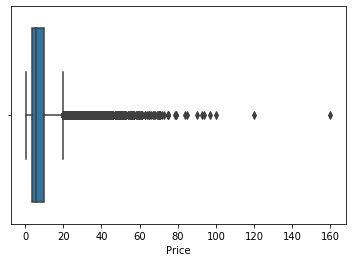

In [78]:
sns.boxplot(df.Price)

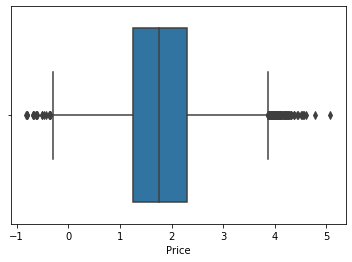

In [79]:
sns.boxplot(np.log(df.Price))

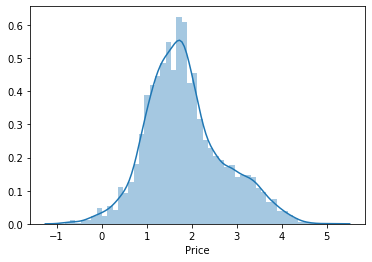

In [80]:
sns.distplot(np.log(df.Price))

In [81]:
len(df[df.Price > df.Price.quantile(.98)])/len(df)

0.020095367847411442

In [82]:
len(df)

5872

In [83]:
df_p=df[df.Price < df.Price.quantile(.99)]

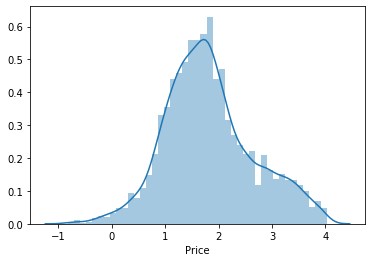

In [84]:
sns.distplot(np.log(df_p.Price))

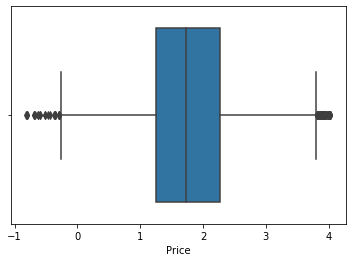

In [85]:
sns.boxplot(np.log(df_p.Price))

In [86]:
df_p['lprice'] = np.log(df_p.Price)

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [87]:
df_p.drop('Price',axis=1,inplace=True)

F:\Anaconda\lib\site-packages\pandas\core\frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [88]:
df_p

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,lprice
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,0.559616
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,2.525729
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,1.504077
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,1.791759
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,2.875822
...,...,...,...,...,...,...,...,...,...,...,...
5867,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,1.558145
5868,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,1.386294
5869,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,1.064711
5870,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,0.974560


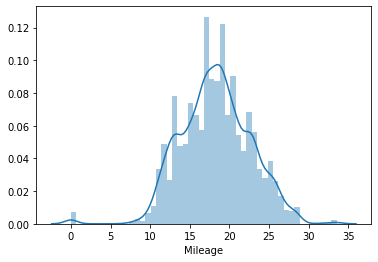

In [89]:
sns.distplot(df.Mileage)

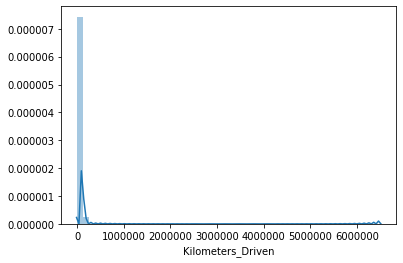

In [90]:
sns.distplot((df.Kilometers_Driven))

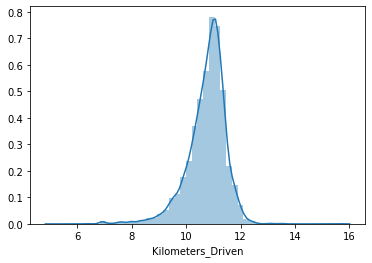

In [91]:
sns.distplot(np.log(df.Kilometers_Driven))

In [92]:
df_p['logKD'] = np.log(df_p.Kilometers_Driven)

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [93]:
df_p.drop('Kilometers_Driven',axis=1,inplace=True)

F:\Anaconda\lib\site-packages\pandas\core\frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [94]:
test['logKD'] = np.log(test.Kilometers_Driven)
test.drop('Kilometers_Driven',axis=1,inplace=True)

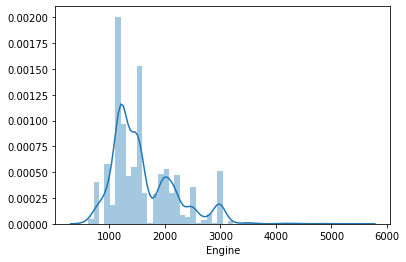

In [95]:
sns.distplot(df_p.Engine)

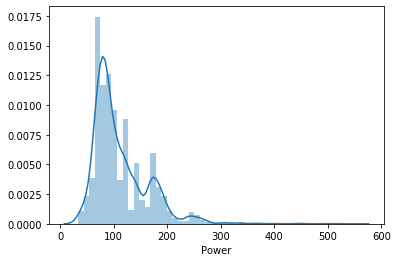

In [96]:
sns.distplot(df_p.Power)

In [97]:
df_p.describe()

,Year,Mileage,Engine,Power,Seats,lprice,logKD
count,5813.000000,5813.000000,5813.000000,5813.000000,5813.000000,5813.000000,5813.000000
mean,2013.450542,18.328032,1609.641149,111.481340,5.287631,1.821170,10.756258
std,3.159856,4.349326,576.505690,50.525162,0.797350,0.833417,0.709685
min,1998.000000,0.000000,624.000000,34.200000,2.000000,-0.820981,5.141664
25%,2012.000000,15.300000,1198.000000,75.000000,5.000000,1.252763,10.434116
50%,2014.000000,18.480000,1493.000000,93.700000,5.000000,1.731656,10.878047
75%,2016.000000,21.100000,1968.000000,138.030000,5.000000,2.277267,11.192210
max,2019.000000,33.540000,5461.000000,550.000000,10.000000,4.027849,13.560618


In [98]:
df_p.head(2)

,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,lprice,logKD
0,Mumbai,2010,CNG,Manual,First,26.60,998.0,58.16,5.0,0.559616,11.184421
1,Pune,2015,Diesel,Manual,First,19.67,1582.0,126.20,5.0,2.525729,10.621327


In [99]:
# df_p.Engine.quantile(.99)

In [100]:
def rep_max(x):
    if x > 2993.0:
        return 2993.0
    else:
        return x

In [101]:
print(rep_max(299999))

2993.0


In [102]:
df_pk = df_p.copy()

In [103]:
# df_p.Engine = df_p.Engine.apply(lambda x: rep_max(x))

In [104]:
df_p.describe()

,Year,Mileage,Engine,Power,Seats,lprice,logKD
count,5813.000000,5813.000000,5813.000000,5813.000000,5813.000000,5813.000000,5813.000000
mean,2013.450542,18.328032,1609.641149,111.481340,5.287631,1.821170,10.756258
std,3.159856,4.349326,576.505690,50.525162,0.797350,0.833417,0.709685
min,1998.000000,0.000000,624.000000,34.200000,2.000000,-0.820981,5.141664
25%,2012.000000,15.300000,1198.000000,75.000000,5.000000,1.252763,10.434116
50%,2014.000000,18.480000,1493.000000,93.700000,5.000000,1.731656,10.878047
75%,2016.000000,21.100000,1968.000000,138.030000,5.000000,2.277267,11.192210
max,2019.000000,33.540000,5461.000000,550.000000,10.000000,4.027849,13.560618


In [105]:
# sns.distplot(df_p.Engine)

In [106]:
# sns.boxplot(df_p.Engine)

In [107]:
# df_p.Power.quantile(.99)

In [108]:
def rep_maxp(x):
    if x > 271.0:
        return 271.0
    else:
        return x

In [109]:
# df_p.Power = df_p.Power.apply(lambda x: rep_max(x))

In [110]:
# sns.boxplot(df_p.Power)

In [111]:
# sns.distplot(df_p.Power)

In [112]:
X=df_p.drop('lprice',axis=1)
y=df_p.lprice

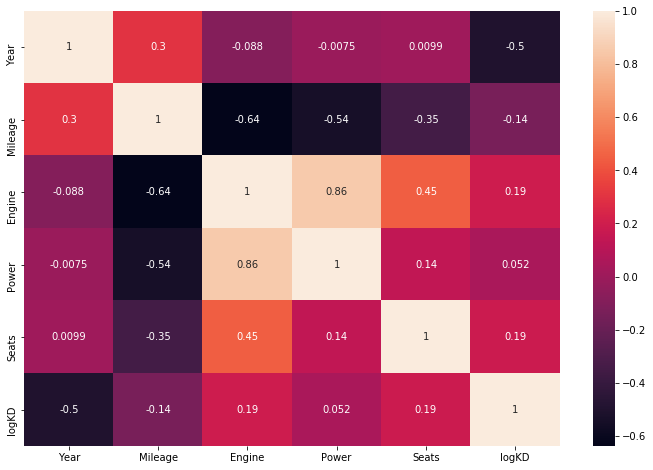

In [113]:
plt.figure(figsize=(12,8))
sns.heatmap(X.corr(),annot=True)

In [114]:
X.corr()

,Year,Mileage,Engine,Power,Seats,logKD
Year,1.000000,0.297907,-0.087734,-0.007532,0.009949,-0.499173
Mileage,0.297907,1.000000,-0.637306,-0.537692,-0.346315,-0.136995
Engine,-0.087734,-0.637306,1.000000,0.855083,0.448438,0.191605
Power,-0.007532,-0.537692,0.855083,1.000000,0.141418,0.052349
Seats,0.009949,-0.346315,0.448438,0.141418,1.000000,0.187026
logKD,-0.499173,-0.136995,0.191605,0.052349,0.187026,1.000000


In [115]:
#Create a Function to filter out the columns which are colrelated with threshhold value
# for i in len(X.select_dtypes(exclude='object').columns)):
    

In [116]:
len(X.select_dtypes(exclude='object').columns)

6

In [117]:
#We can drop Engine or Power as they are higly colrelated (.86)
#dropping Power
X.drop('Power',axis=1,inplace=True)

In [118]:
test.drop('Power',axis=1,inplace=True)

In [119]:
test.head(2)

,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,logKD
0,Delhi,2014,CNG,Manual,First,32.26,998.0,4.0,10.619594
1,Coimbatore,2013,Petrol,Manual,Second,24.70,796.0,5.0,10.905828


# Covert Ordinal catagory by Labelencoder
['Owner_Type'] - Ordinal
# Convert Nominal Category with one_hot_coding
['Location', 'Fuel_Type', 'Transmission'] - Nominal

In [120]:
from sklearn.preprocessing import LabelEncoder

In [121]:
lenc=LabelEncoder()
X.Owner_Type = lenc.fit_transform(X.Owner_Type)

In [122]:
test.Owner_Type = lenc.transform(test.Owner_Type)

In [123]:
cat_fet = X.select_dtypes(include='object')

In [124]:
cat_fet

,Location,Fuel_Type,Transmission
0,Mumbai,CNG,Manual
1,Pune,Diesel,Manual
2,Chennai,Petrol,Manual
3,Chennai,Diesel,Manual
4,Coimbatore,Diesel,Automatic
...,...,...,...
5867,Delhi,Diesel,Manual
5868,Jaipur,Diesel,Manual
5869,Jaipur,Diesel,Manual
5870,Kolkata,Petrol,Manual


In [125]:
X=pd.get_dummies(X,drop_first=True)
test=pd.get_dummies(test,drop_first=True)

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=26)

In [128]:
X_train.describe().Engine

count    4069.000000
mean     1604.251167
std       566.696638
min       624.000000
25%      1198.000000
50%      1489.000000
75%      1968.000000
max      5461.000000
Name: Engine, dtype: float64

In [129]:
X_train.Engine.quantile(.99)

2993.0

In [130]:
def rep_max(x):
    if x > 2993.0:
        return 2993.0
    else:
        return x

In [131]:
X_train.Engine = X_train.Engine.apply(lambda x:rep_max(x))

F:\Anaconda\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [132]:
X_train.Engine.describe()

count    4069.000000
mean     1599.413861
std       549.107335
min       624.000000
25%      1198.000000
50%      1489.000000
75%      1968.000000
max      2993.000000
Name: Engine, dtype: float64

In [133]:
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor

In [134]:
mET=ExtraTreesRegressor()
mET.fit(X_train,y_train)
print('Training Score with ExtraTreesRegressor : ',mET.score(X_train,y_train))
print('Test Score with ExtraTreesRegressor     : ',mET.score(X_test,y_test))

Training Score with ExtraTreesRegressor :  0.9999925587684158
Test Score with ExtraTreesRegressor     :  0.916766739338475


In [135]:
ET_feature=pd.Series(mET.feature_importances_)
ET_feature.index=X.columns

In [136]:
ET_feature.sort_values(ascending=False)

Transmission_Manual    0.311828
Engine                 0.227124
Year                   0.208773
Fuel_Type_Petrol       0.066858
Fuel_Type_Diesel       0.036842
Mileage                0.033136
logKD                  0.028624
Seats                  0.026731
Owner_Type             0.013108
Location_Kolkata       0.008157
Location_Coimbatore    0.006516
Location_Hyderabad     0.005021
Location_Pune          0.004575
Location_Delhi         0.004522
Location_Chennai       0.004090
Location_Bangalore     0.003835
Location_Mumbai        0.003776
Location_Jaipur        0.003403
Location_Kochi         0.003050
Fuel_Type_LPG          0.000030
dtype: float64

In [137]:
mRF=RandomForestRegressor()
mRF.fit(X_train,y_train)
print('Training Score with RandomForestRegressor : ',mRF.score(X_train,y_train))
print('Test Score with RandomForestRegressor     : ',mRF.score(X_test,y_test))

Training Score with RandomForestRegressor :  0.9862263246018265
Test Score with RandomForestRegressor     :  0.9201745622326024


In [138]:
RF_feature=pd.Series(mRF.feature_importances_)
RF_feature.index=X.columns
RF_feature.sort_values(ascending=False)

Engine                 0.558095
Year                   0.255397
Transmission_Manual    0.067997
Mileage                0.037101
logKD                  0.035874
Seats                  0.009558
Location_Kolkata       0.006428
Owner_Type             0.004957
Location_Coimbatore    0.003360
Location_Hyderabad     0.003346
Location_Delhi         0.002766
Location_Pune          0.002423
Location_Bangalore     0.002350
Location_Mumbai        0.002060
Location_Chennai       0.001997
Location_Jaipur        0.001848
Fuel_Type_Diesel       0.001486
Location_Kochi         0.001473
Fuel_Type_Petrol       0.001466
Fuel_Type_LPG          0.000018
dtype: float64

In [139]:
X_train_rmvf = X_train.drop(['Seats','Owner_Type'],axis=1)
X_test_rmvf = X_test.drop(['Seats','Owner_Type'],axis=1)

In [140]:
mRF_rmvf=RandomForestRegressor()
mRF_rmvf.fit(X_train_rmvf,y_train)
print('Training Score with RandomForestRegressor : ',mRF_rmvf.score(X_train_rmvf,y_train))
print('Test Score with RandomForestRegressor     : ',mRF_rmvf.score(X_test_rmvf,y_test))

Training Score with RandomForestRegressor :  0.9864069661811895
Test Score with RandomForestRegressor     :  0.9179060801561649


In [161]:
from sklearn.linear_model import LinearRegression
lrm=LinearRegression()

In [163]:
lrm.fit(X_train_rmvf,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [164]:
print('Training Score with LinearRegressor : ',lrm.score(X_train_rmvf,y_train))
print('Test Score with LinearRegressor     : ',lrm.score(X_test_rmvf,y_test))

Training Score with LinearRegressor :  0.8345579678213997
Test Score with LinearRegressor     :  0.8391556293828778


In [166]:
with open('lrm.pkl', 'wb') as file:  
    pickle.dump(lrm, file)

In [167]:
with open('lrm.pkl','rb') as file:
    m=pickle.load(file)

In [141]:
import pickle

In [142]:
with open('Pk_RandomForest.pkl', 'wb') as file:  
    pickle.dump(mRF_rmvf, file)

In [143]:
with open('Pk_RandomForest.pkl', 'rb') as file:  
    Pickled_RF_Model = pickle.load(file)


In [144]:
test_rmvf=test.drop(['Seats','Owner_Type'],axis=1)

In [145]:
results=Pickled_RF_Model.predict(test_rmvf)

In [146]:
results

array([1.19923661, 1.0466243 , 2.82582299, ..., 1.26422316, 1.3578971 ,
       2.64013525])

In [147]:
import flask 

In [148]:
import pickle

In [149]:
with open('Pkl_RandomForest.pkl', 'rb') as file:
    model=pickle.load(file)

F:\Anaconda\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.24.1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
F:\Anaconda\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.24.1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [150]:
X_train_rmvf

,Year,Mileage,Engine,logKD,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
2084,2012,18.9,998.0,10.870814,0,0,0,0,1,0,0,0,0,0,0,0,1,1
3309,2005,15.3,1341.0,11.407565,0,0,0,0,0,0,0,0,1,0,0,0,1,1
658,2006,13.8,1299.0,11.495708,0,0,0,0,0,0,0,0,0,1,0,0,1,1
2249,2008,19.7,796.0,11.127263,0,1,0,0,0,0,0,0,0,0,0,0,1,1
3284,2015,18.9,1197.0,10.819778,1,0,0,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,2011,17.5,1298.0,10.969491,0,0,0,0,0,0,0,0,1,0,0,0,1,1
2007,2009,13.6,1991.0,11.082143,0,0,0,0,0,0,0,1,0,0,1,0,0,1
1472,2008,11.7,2354.0,11.736069,0,0,0,0,0,0,0,0,1,0,0,0,1,0
5495,2011,13.7,1798.0,11.264464,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [151]:
X_test_rmvf

,Year,Mileage,Engine,logKD,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
2267,2015,14.62,1999.0,10.972311,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1073,2015,12.07,2967.0,10.891820,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4221,2016,20.40,1197.0,9.852194,0,0,0,0,0,0,0,0,1,0,0,0,1,1
2089,2012,20.92,998.0,11.512925,0,0,0,0,0,0,0,0,0,1,0,0,1,1
2075,2016,21.40,1197.0,9.439307,0,0,0,0,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3257,2017,20.30,998.0,10.332376,0,0,0,0,0,0,1,0,0,0,0,0,1,1
3017,2011,18.50,1197.0,10.865879,0,0,0,0,0,0,0,0,1,0,0,0,1,1
2800,2014,18.53,1968.0,11.034890,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2629,2008,17.92,1086.0,11.131401,0,0,0,0,1,0,0,0,0,0,0,0,1,1


In [152]:
# year,mileage,engine,lgkd,l_b,l_c,l_cb,L_d,L_h,L_j,L_ko,L_m,L_p,f_d,F_l,f_p,T_m
len([2002,15,1800,11,1,0,0,0,0,0,0,0,0,0,1,0,0,0])

18

In [153]:
X_test_rmvf.columnsns

AttributeError: 'DataFrame' object has no attribute 'columnsns'

In [154]:
len(X_test_rmvf.columns)

18

In [155]:
with open('F:\Flask_learning\car_price\Pkl_RandomForest.pkl','rb') as file:
            modelp=pickle.load(file)

F:\Anaconda\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.24.1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
F:\Anaconda\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.24.1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [156]:
a=np.array([2021,15,1800,11,1,0,0,0,0,0,0,0,0,0,1,0,0,1])

In [168]:
np.exp(m.predict(a.reshape(1, -1)))

array([19.45712894])

In [158]:
res=np.exp(model.predict([[2021,15,1800,11,1,0,0,0,0,0,0,0,0,0,1,0,0,1]]))

In [159]:
res=round(res[0],2)

In [160]:
res

13.2

In [170]:
cars.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [ ]:
X_test_rmvf.info()

In [ ]:
cars.head()

In [174]:
import pickle

In [175]:
pickle.__version__


AttributeError: module 'pickle' has no attribute '__version__'